In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10, 10]
from tqdm import tqdm_notebook
import random
import numpy as np

In [2]:
def read_points(dataset_name, label_col_number, true_label):
    points = []
    labels = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != label_col_number:
                        float_row.append(float(row[i]))
                points.append(np.array(float_row))
                if row[label_col_number] == true_label:
                    labels.append(1)
                else:
                    labels.append(-1)
    return points, labels


In [3]:
def h(x, w):
    value = 1.0 / (1.0 + np.exp(-np.inner(w, x)))
    if value <= 0.5:
        return -1
    return 1

In [4]:
def logistic_regression(points, labels, N, lr, batch_size):
    w = []
    for i in range(len(points[0])):
        w.append(0.0)
    test_line = []
    w = np.array(w)
 
    for _ in tqdm_notebook(range(N)): 
        sm = 0
        for i in range(len(points)):
            sm +=labels[i] * points[i] / (1 + np.e **(labels[i] * np.inner(w, points[i])))
            if i % batch_size == 0 and i != 0:
                w -= - lr * 1.0 / batch_size * sm
                sm = 0
        
        good_points = 0
        for i in range(len(points)):
            if h(points[i], w) == labels[i]:
                good_points += 1
        test_line.append(1.0 * good_points / len(points))
    return w, test_line       


0.912126537786


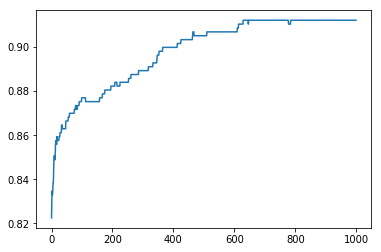

In [5]:
points, labels = read_points("../Datasets/cancer.csv", 0, 'M')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_points = scaler.fit_transform(points)

N = 1000
w, y = logistic_regression(scaled_points, labels, N, 0.01, 10)
print(y[-1])
x = list(range(N))
plt.plot(x, y)
plt.show()


0.893066724625


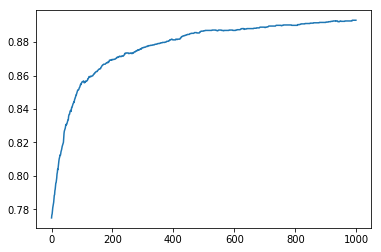

In [6]:
points, labels = read_points("../Datasets/spam.csv", 57, '1')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_points = scaler.fit_transform(points)

N = 1000
w, y = logistic_regression(scaled_points, labels, N, 0.01, 10)
print(y[-1])
x = list(range(N))
plt.plot(x, y)
plt.show()